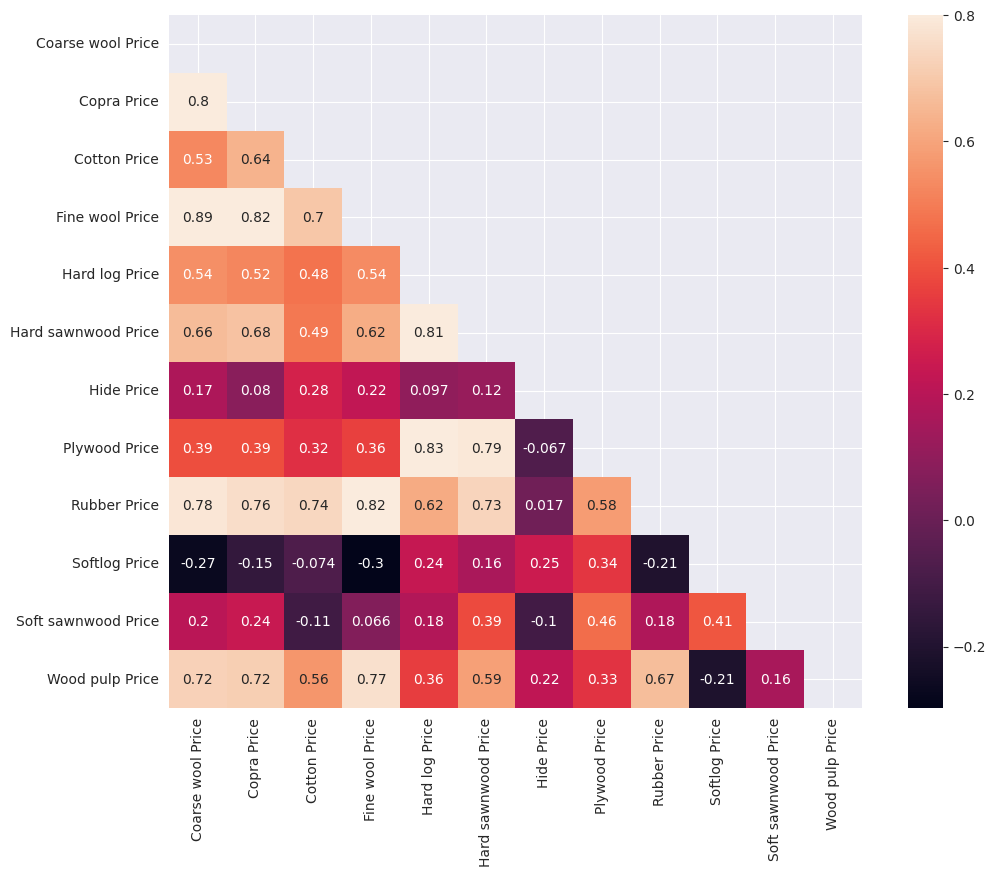

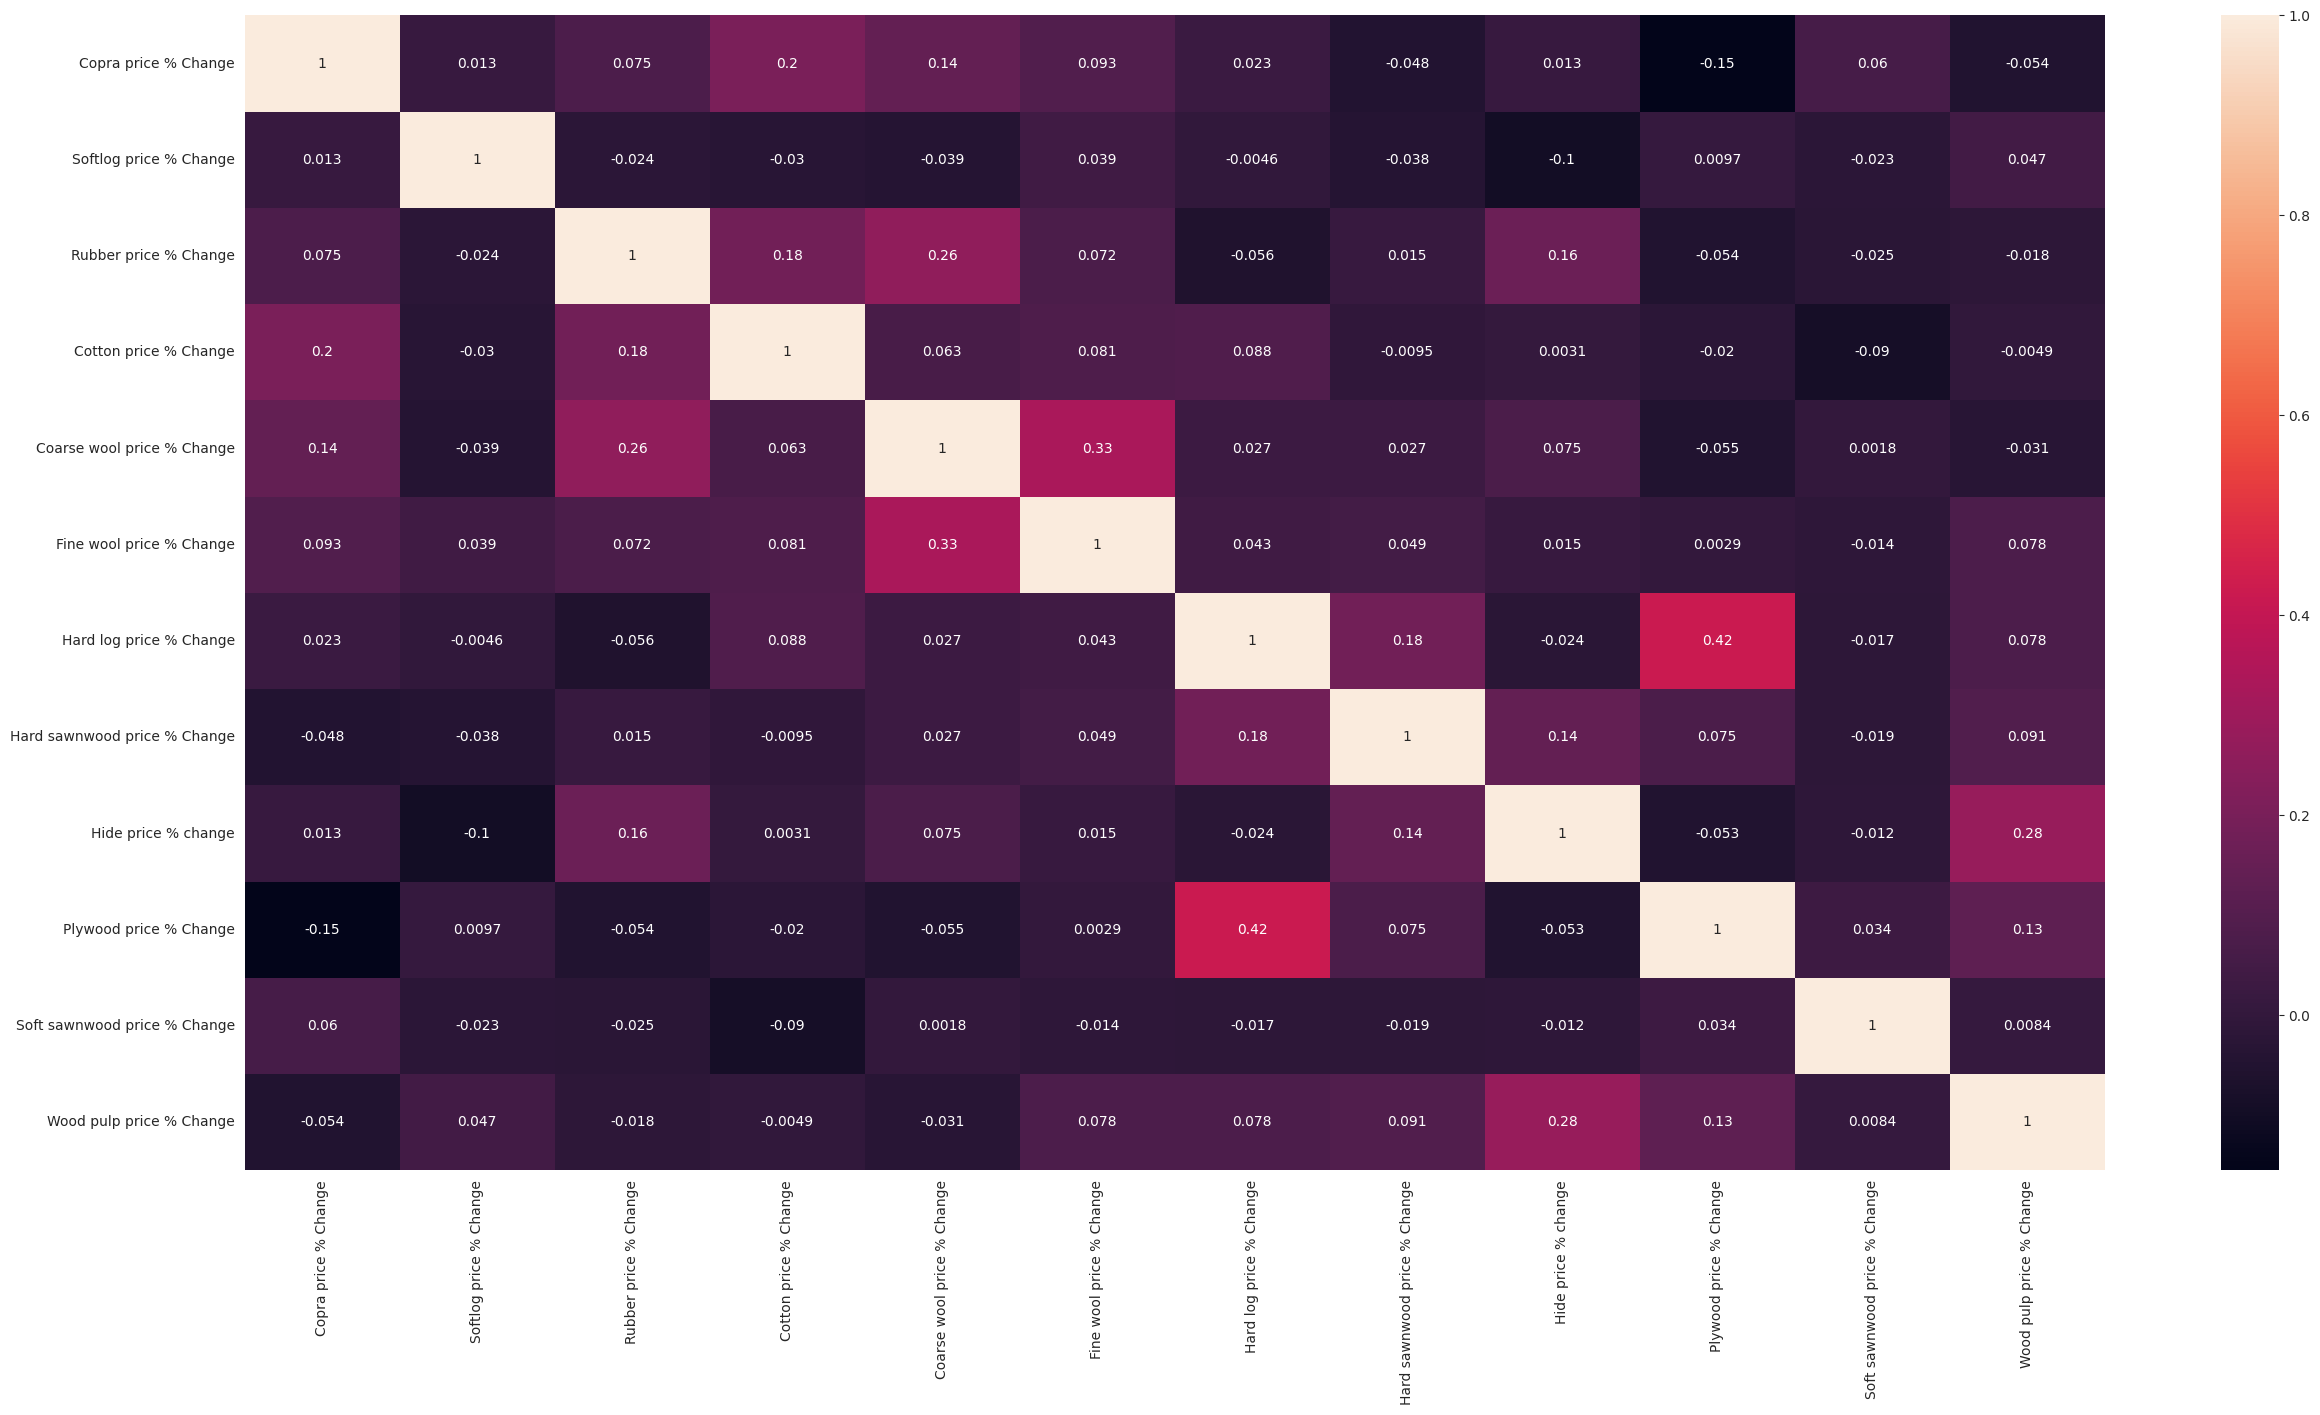

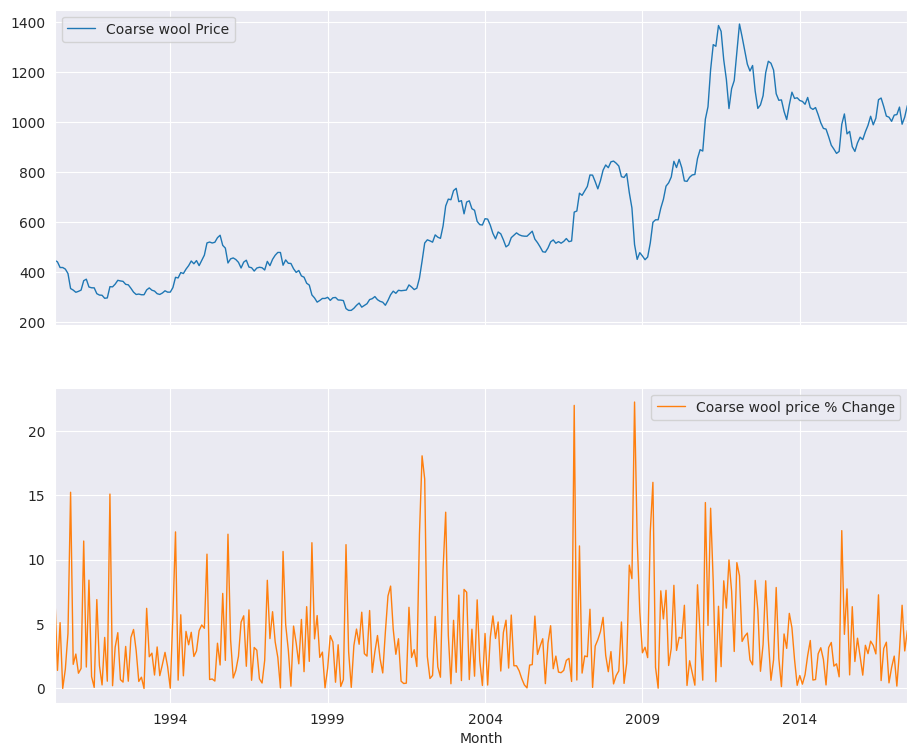

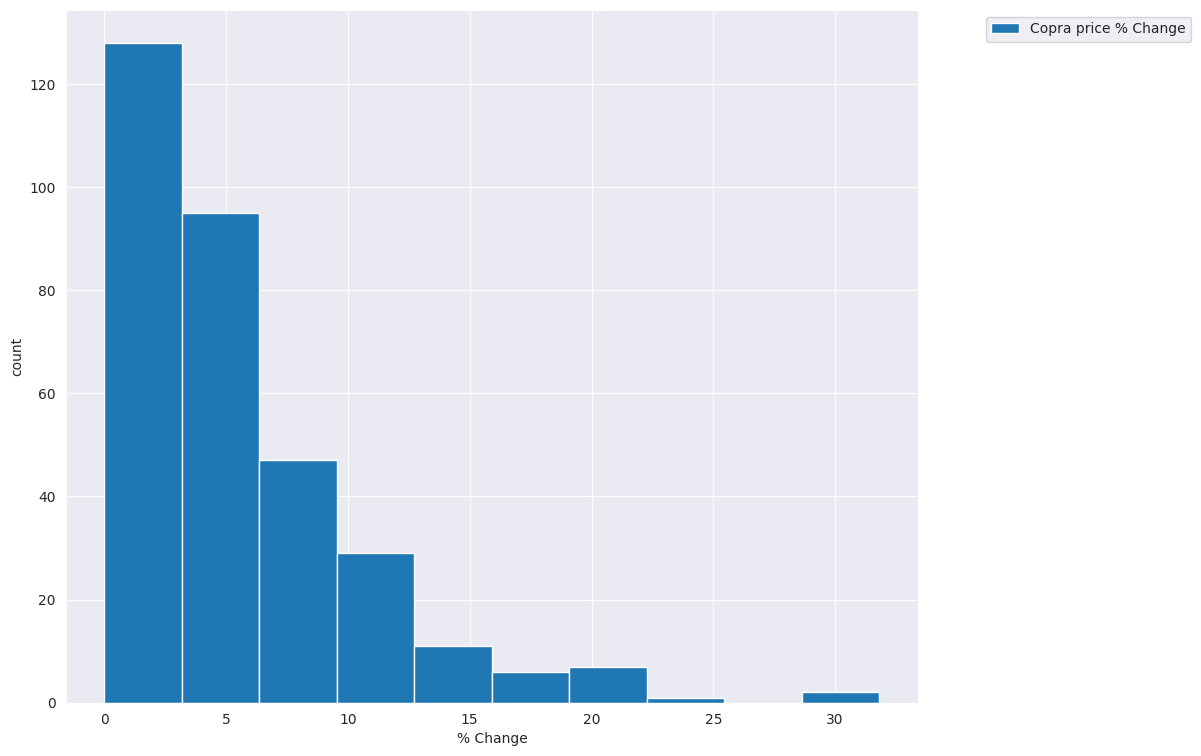

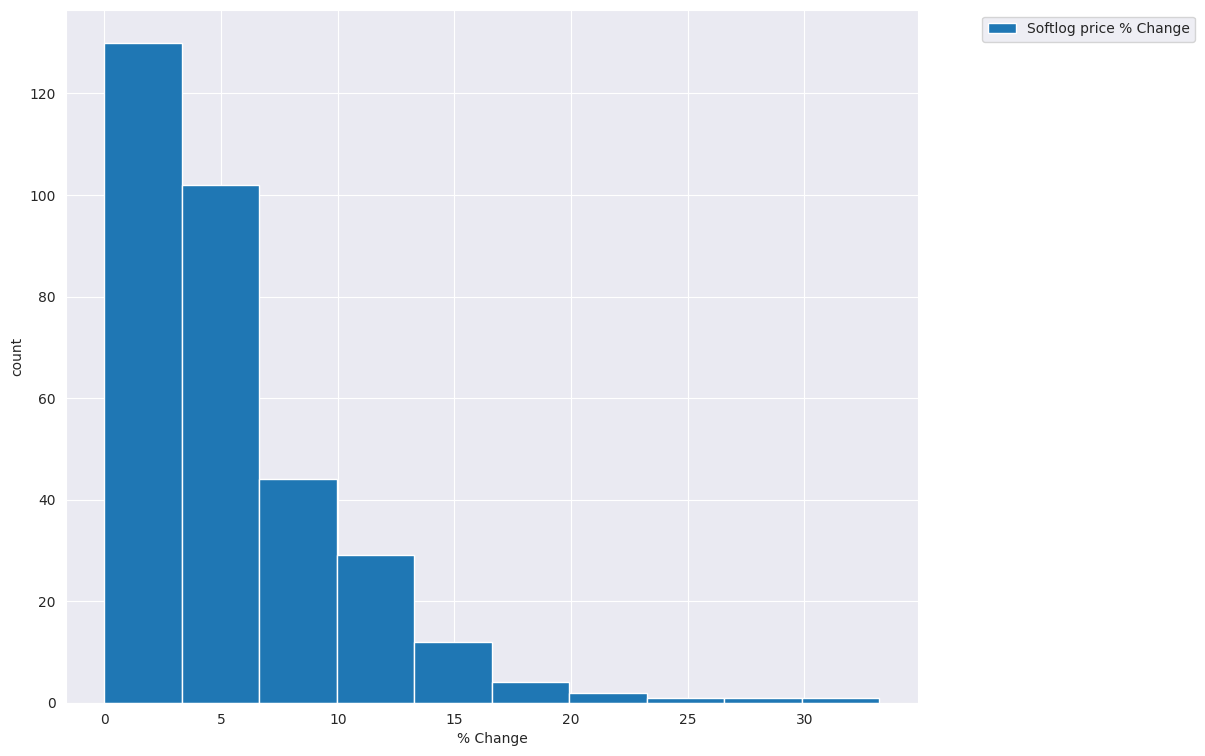

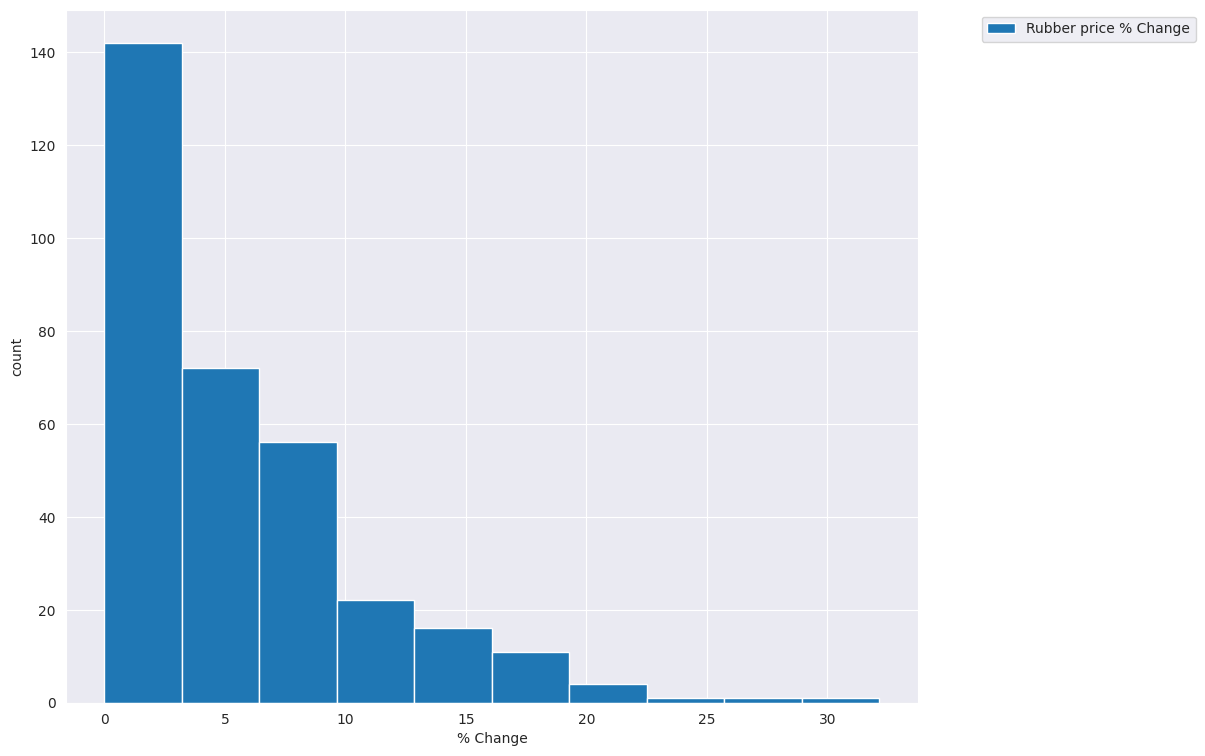

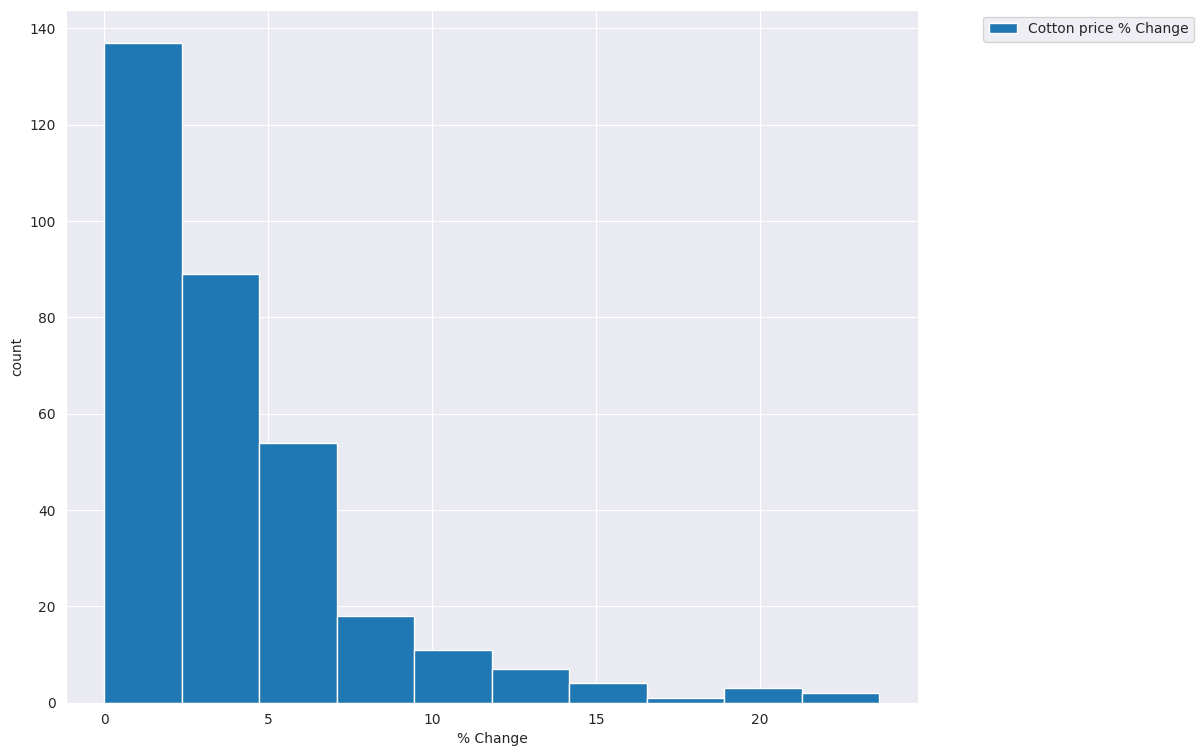

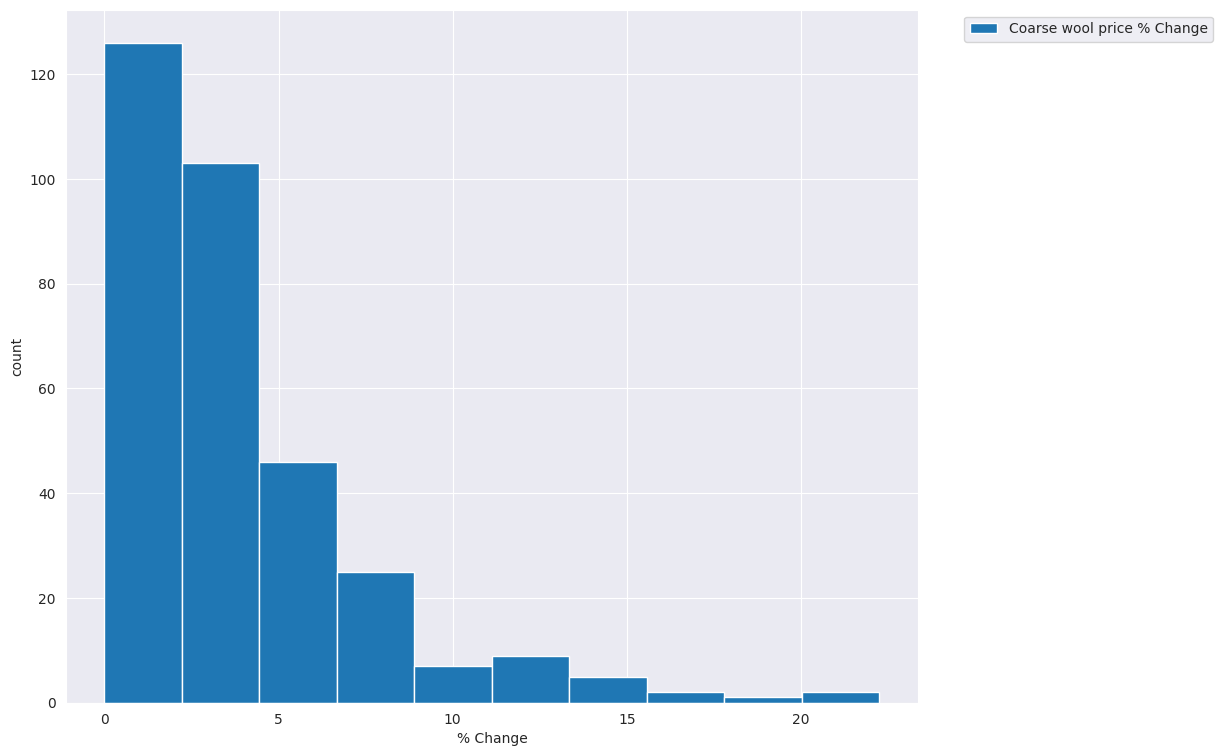

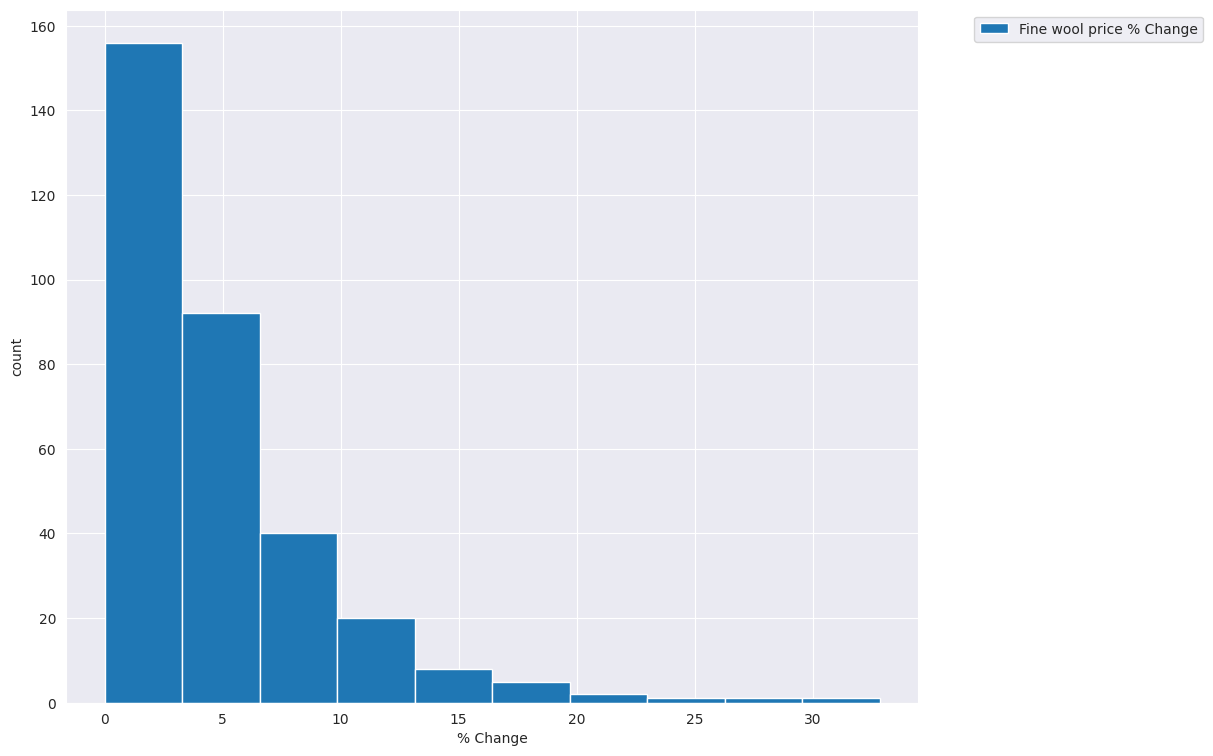

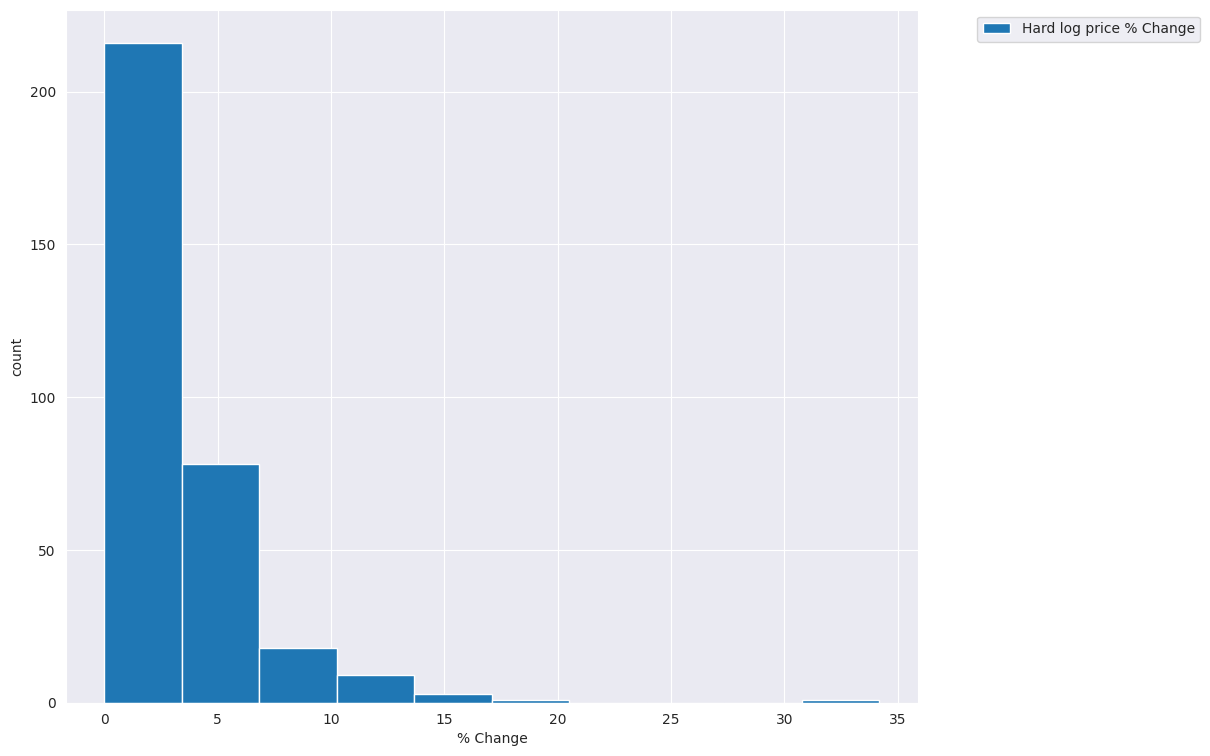

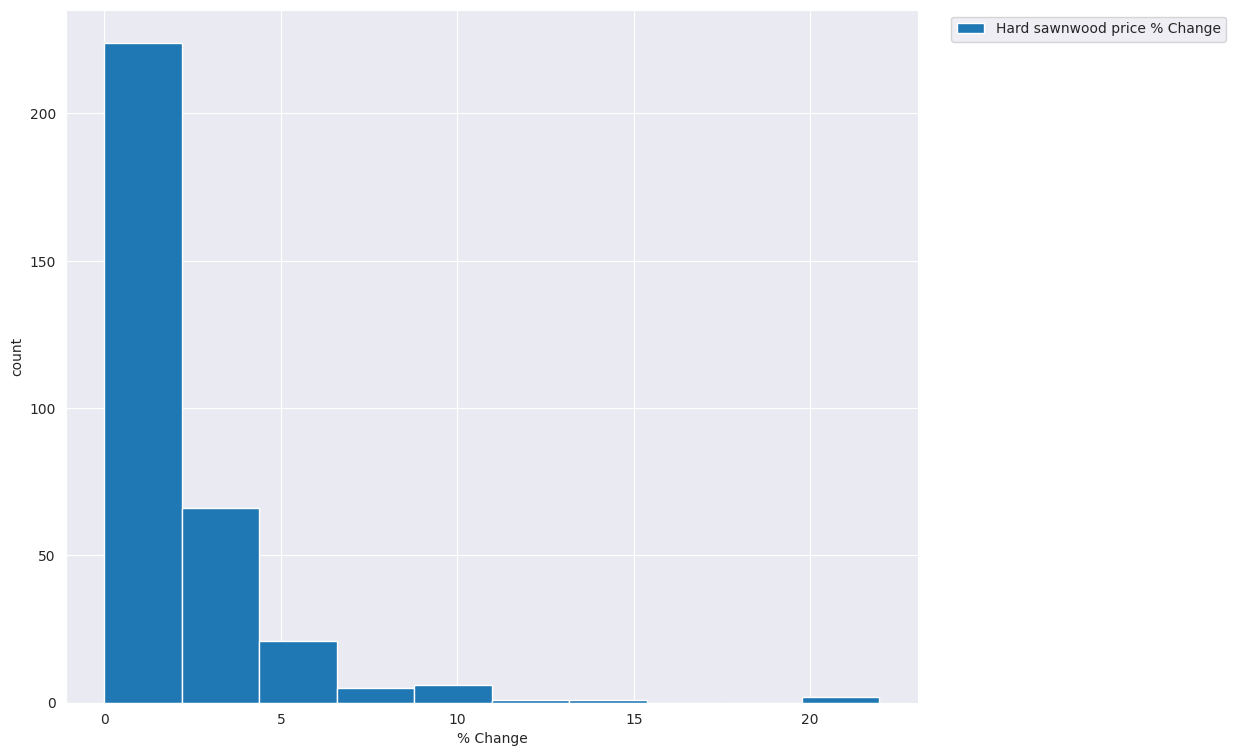

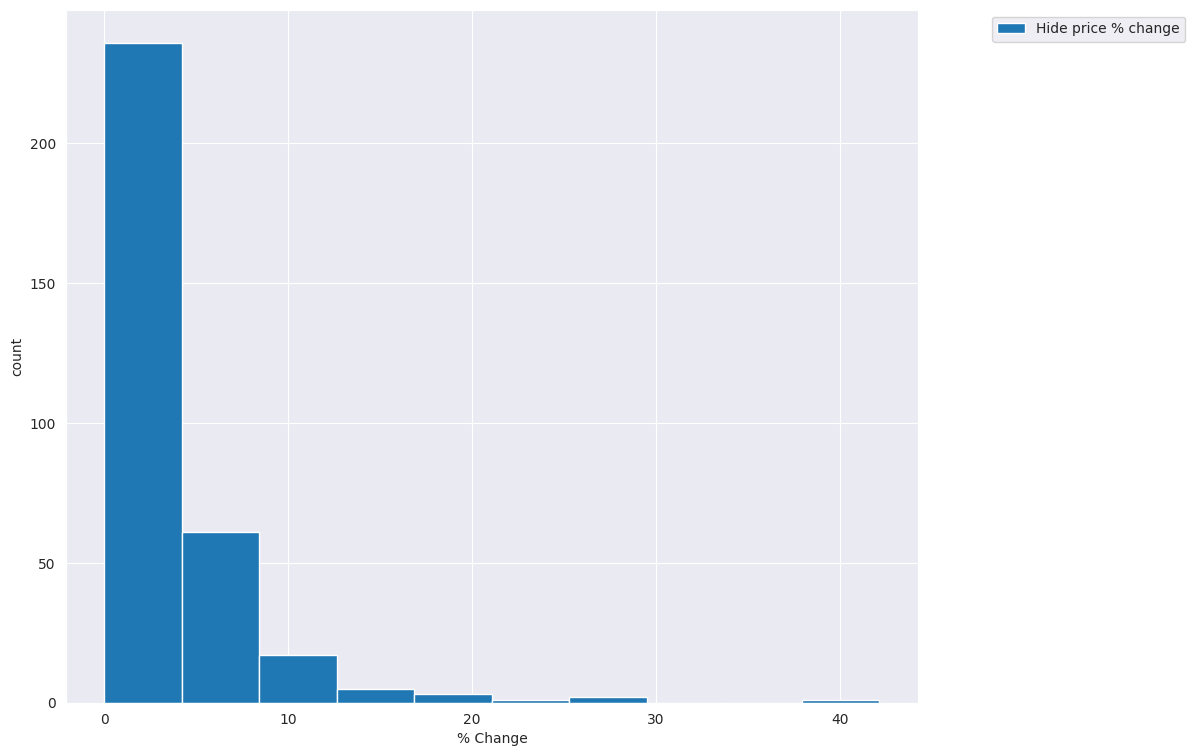

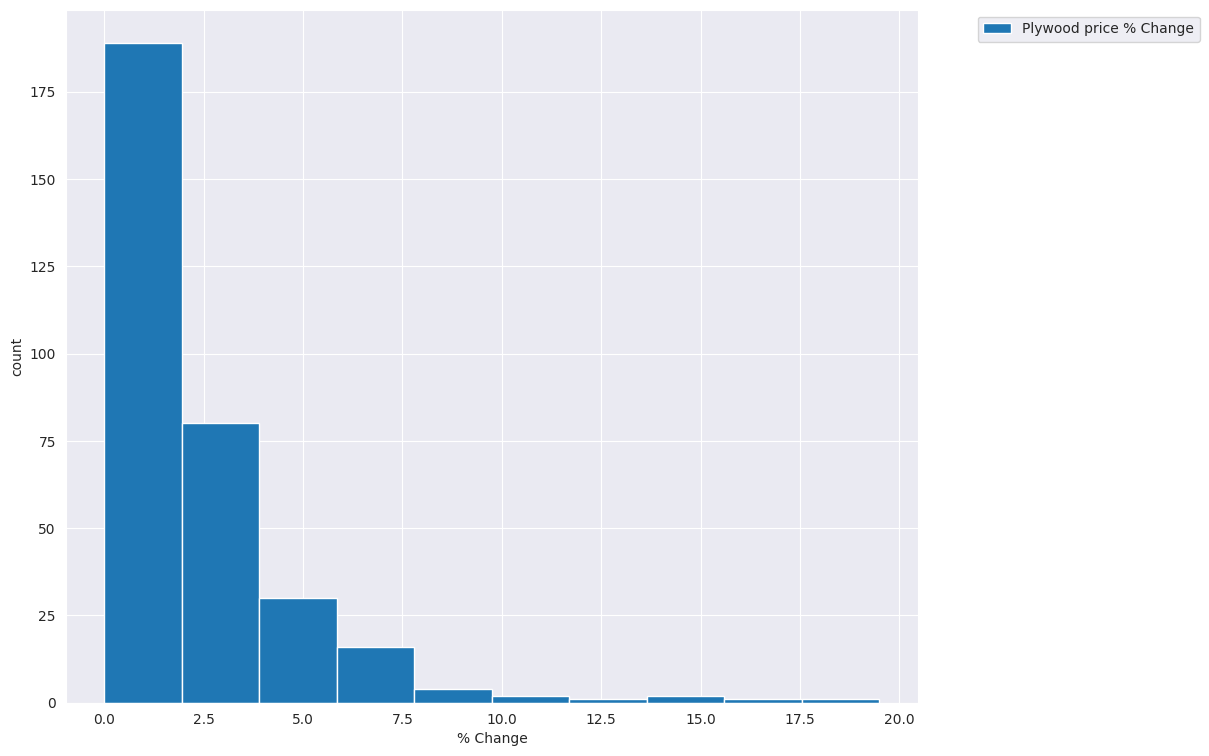

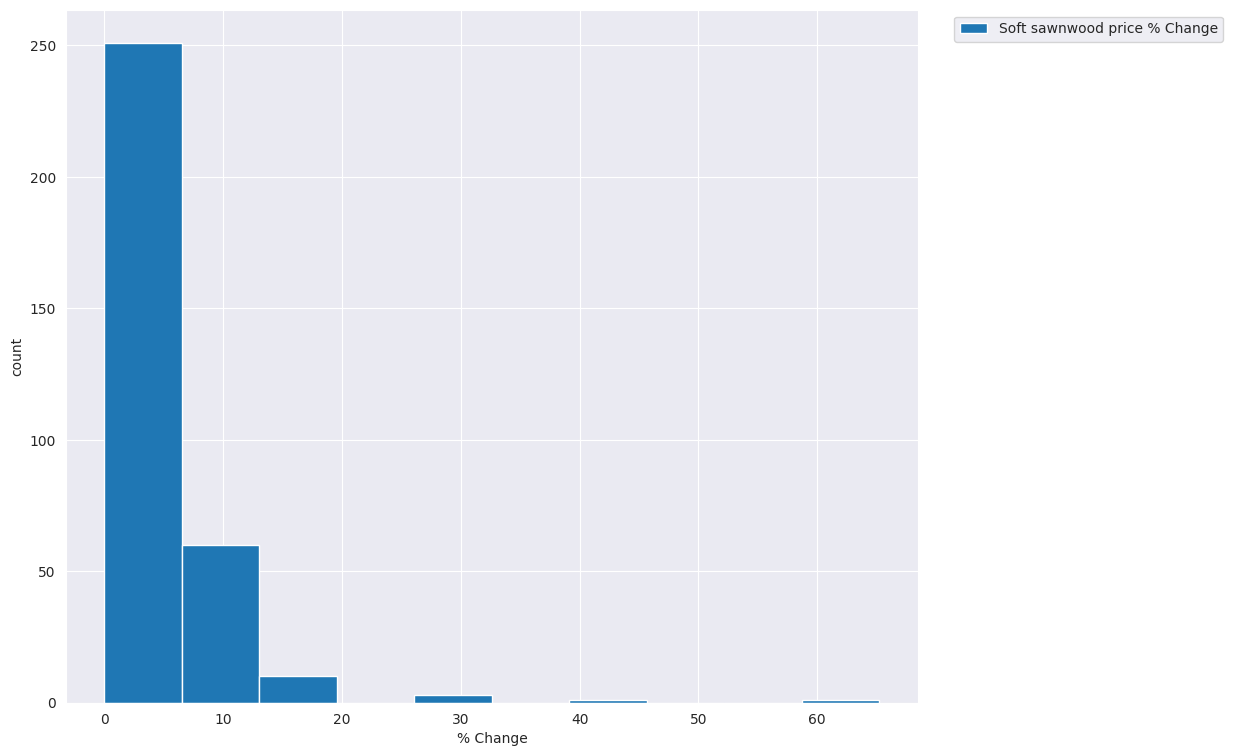

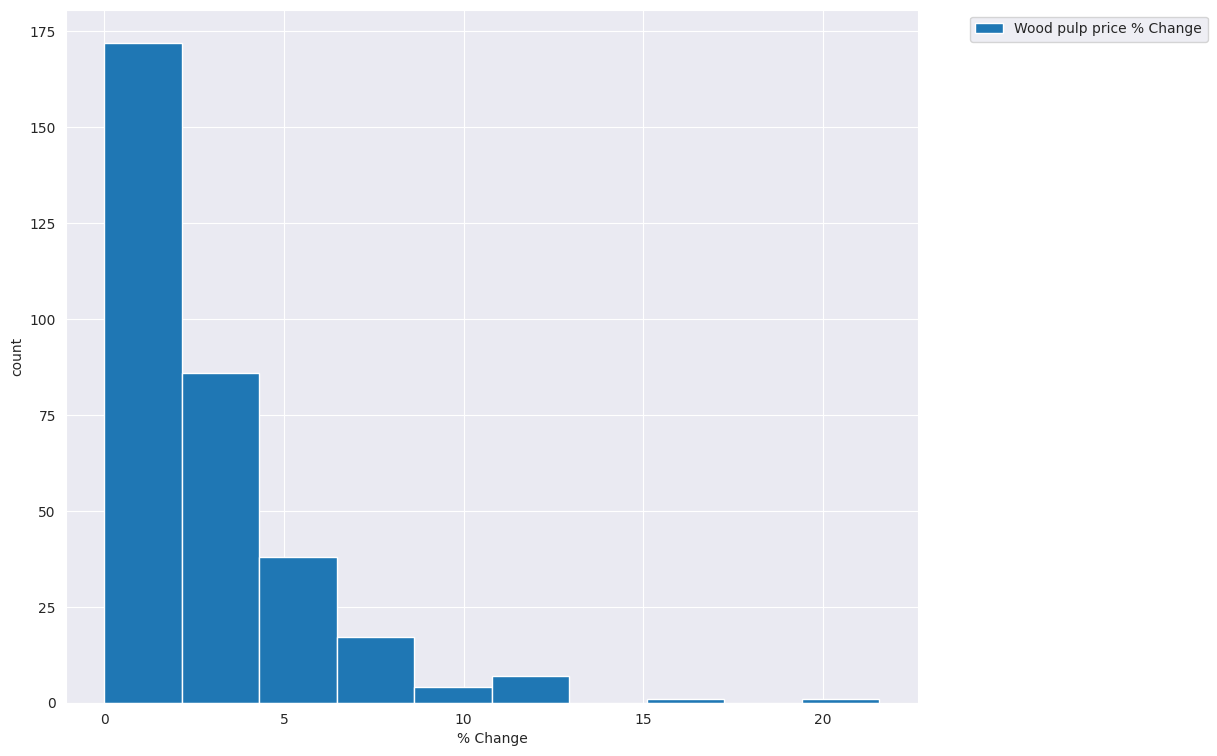

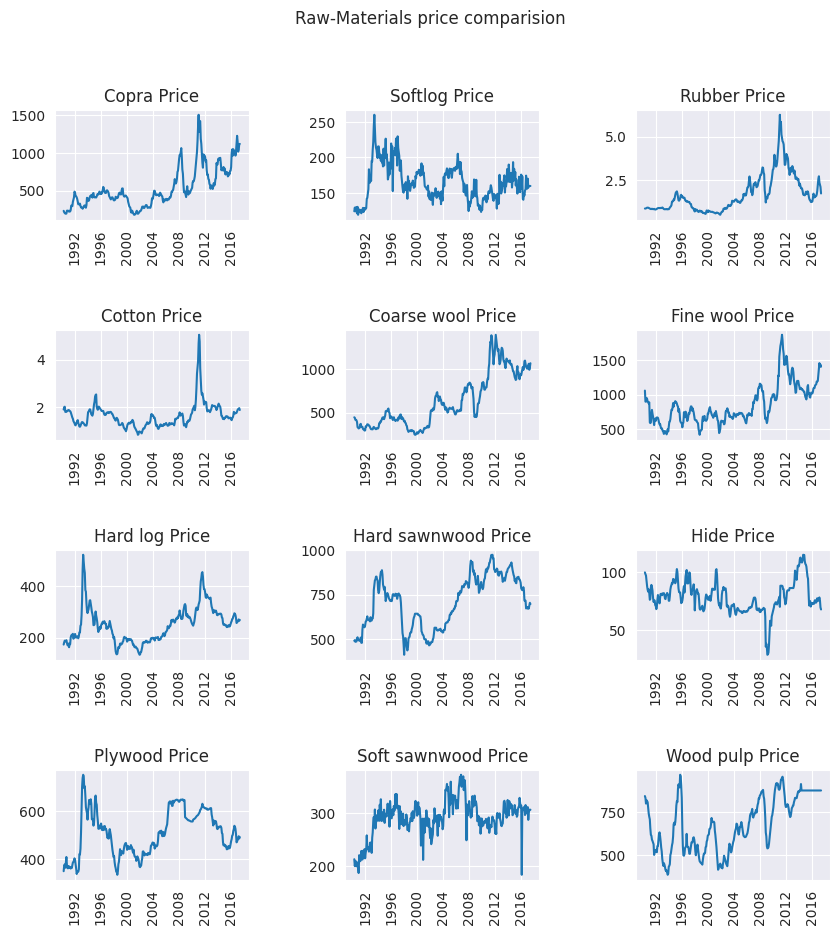

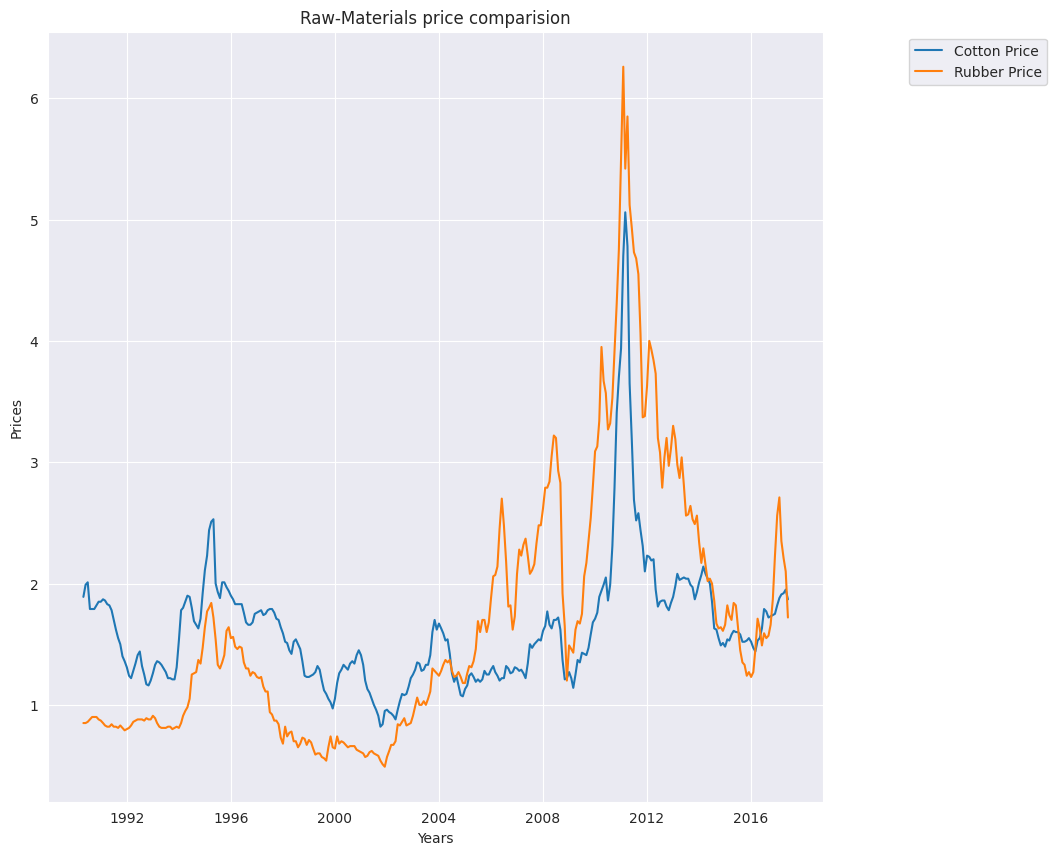

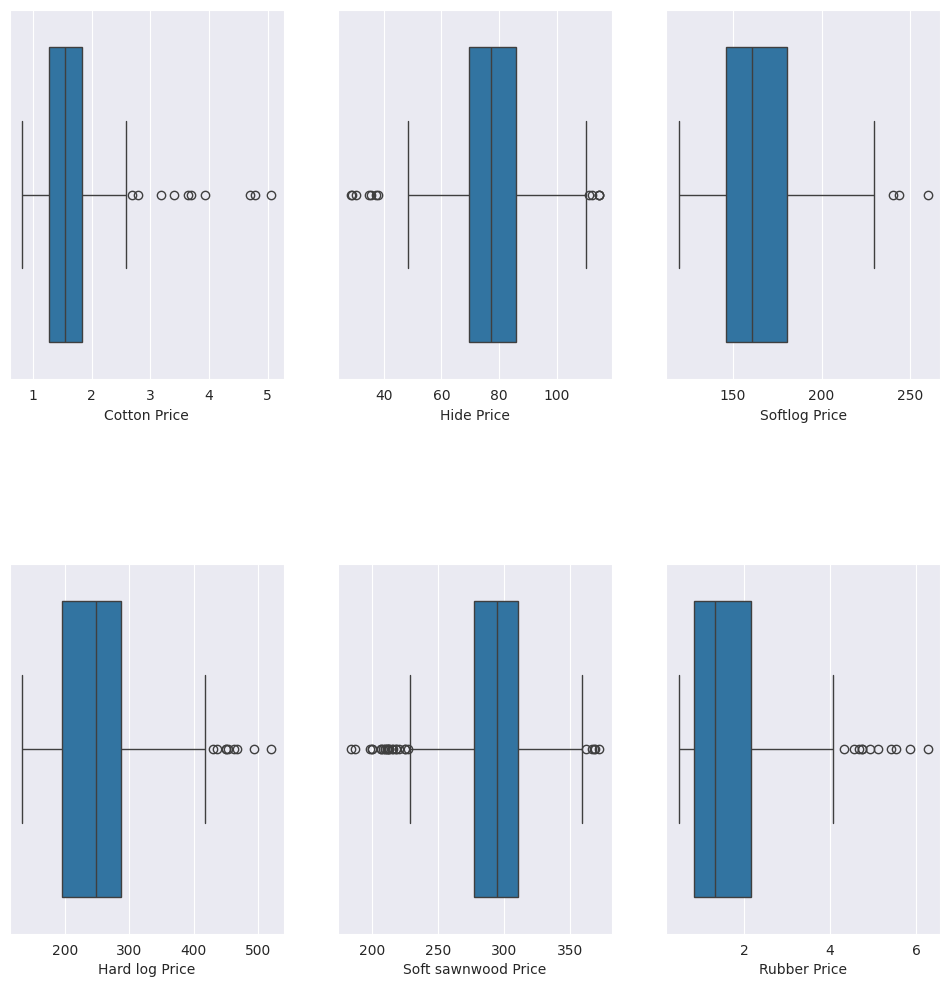

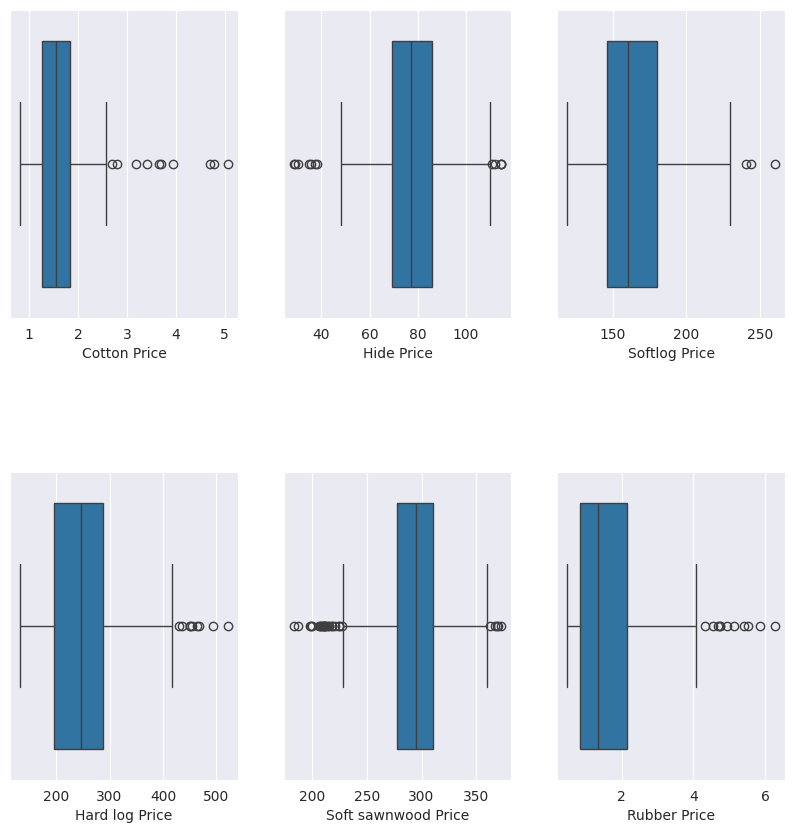

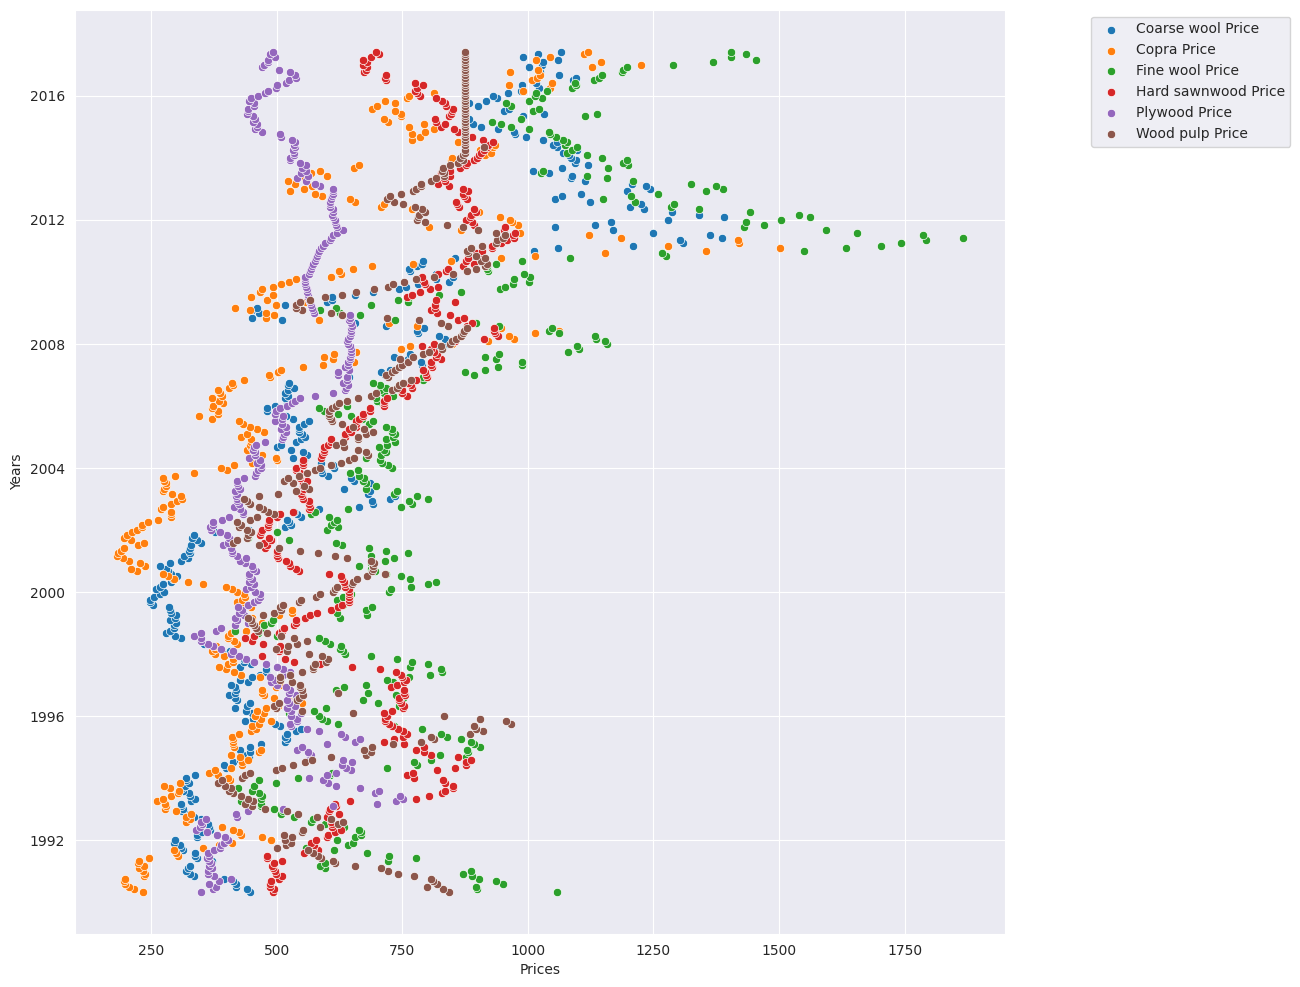

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/agricultural_raw_material.csv.xls')

# Data cleaning
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
df = df.dropna()

# Converting data type to float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype('float')

# Convert month to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'].str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')

sns.set_style('darkgrid')
plt.figure(figsize=(12, 9))

# raw-materials list
raw_data = ['Coarse wool Price',  'Copra Price', 'Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

# getting the correlation matrix
corrmat = df[raw_data].corr()

# masking the upper triangle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))

sns.heatmap(corrmat, vmax=.8, mask=mask, square=True, annot=True)
plt.show()

plt.figure(figsize=(30, 15))
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change', 'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

# generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change', 'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12, 12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2, 1))

plt.figure(figsize=(10, 10))
materialslist = ['Copra Price', 'Softlog Price', 'Rubber Price', 'Cotton Price', 'Coarse wool Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Soft sawnwood Price', 'Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4, 3, i + 1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Raw-Materials price comparision")

plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2, 1))

plt.figure(figsize=(12, 12))
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowlist[i]])

plt.show()

plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])

highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]], y=df.index)
plt.legend(highlist, loc='upper center', bbox_to_anchor=(1.2,1))
plt.show()
